In [2]:
!python -V

Python 3.9.12


In [1]:
import pandas as pd

In [3]:
import pickle

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_parquet('./data/green_tripdata_2021-01.parquet')

df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [5]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
print(X_train)

target = 'duration'
y_train = df[target].values
print(y_train)

lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_train)
print(y_pred)

mean_squared_error(y_train, y_pred, squared=False)

  (0, 54)	1.0
  (0, 447)	1.0
  (0, 506)	1.01
  (1, 148)	1.0
  (1, 323)	1.0
  (1, 506)	2.53
  (2, 195)	1.0
  (2, 445)	1.0
  (2, 506)	1.12
  (3, 230)	1.0
  (3, 325)	1.0
  (3, 506)	1.99
  (4, 230)	1.0
  (4, 480)	1.0
  (4, 506)	0.45
  (5, 177)	1.0
  (5, 386)	1.0
  (5, 506)	12.19
  (6, 154)	1.0
  (6, 407)	1.0
  (6, 506)	3.39
  (7, 120)	1.0
  (7, 480)	1.0
  (7, 506)	6.69
  (8, 147)	1.0
  :	:
  (73899, 506)	5.33
  (73900, 120)	1.0
  (73900, 332)	1.0
  (73900, 506)	5.18
  (73901, 133)	1.0
  (73901, 290)	1.0
  (73901, 506)	17.13
  (73902, 194)	1.0
  (73902, 378)	1.0
  (73902, 506)	18.18
  (73903, 247)	1.0
  (73903, 487)	1.0
  (73903, 506)	17.63
  (73904, 120)	1.0
  (73904, 438)	1.0
  (73904, 506)	18.36
  (73905, 223)	1.0
  (73905, 479)	1.0
  (73905, 506)	2.5
  (73906, 122)	1.0
  (73906, 325)	1.0
  (73906, 506)	14.48
  (73907, 154)	1.0
  (73907, 271)	1.0
  (73907, 506)	1.81
[ 3.93333333  8.75        5.96666667 ... 11.         27.
 10.        ]
[ 7.18658412 13.58422986  8.50435632 ... 14.08860831

9.775464552087287

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


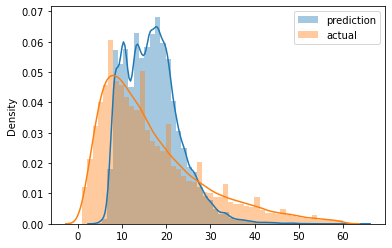

In [9]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [6]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [7]:
df_train = read_dataframe('./data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('./data/green_tripdata_2021-02.parquet')

In [12]:
len(df_train), len(df_val)

(73908, 61921)

In [8]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [9]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [10]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.479562160810692

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


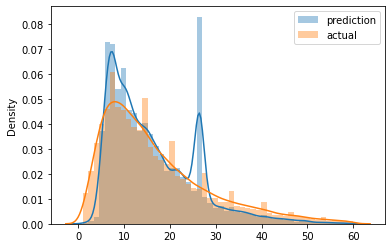

In [12]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [17]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [20]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

11.167275941179728